In [6]:
import yaml
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np

conf = yaml.safe_load(open("conf.yaml"))
plt.style.use(conf["plot_style"])

In [7]:
# Free parameters
T_O = 290 # K
q_O = 0.008
alpha = 0.5 # m/s/K
beta = 0.025 # kg/m^2/s
L, H = 500 * 1000, 10 * 1000 # m
epsilon = H / L
E = 0.8
A = 0.1
A_veg = 0.1
A_desert = 0.3
gamma = 0.5 * 10**4 # 1/(kg/m^2/s)

# Fixed parameters
L_c = 2.6 * 10**6 # J/kg
C_p = 1295 # J/m^3/K
rho = 1.3 # kg/m^3
sigma = 5.67 * 10**(-8) # W/m^2/K^4

# Reference parameters
I_now = 440 # W/m^2
I_past = 460 # W/m^2

In [8]:
l = epsilon * alpha * rho**2 * L_c * q_O / (C_p * beta)
print(f"Parameter l: {l:.2f}")

Parameter l: 10.86


In [11]:
@interact()
def plot_graphs(A=A, E=E, T_O=T_O, q_O=q_O, alpha=alpha, beta=beta, epsilon=epsilon, albedo_feedback=True):

    def P(W):
        return beta * q_O * W / (W + beta / (epsilon * rho))
    
    def A_W(W):
        if not albedo_feedback:
            return A * np.ones(len(W))
        else:
            return np.maximum(A_veg, np.minimum(A_desert - gamma * P(W) * (A_desert - A_veg), A_desert))
    
    def I_out(W):
        return (- E * (E - 2) * sigma * (T_O + W / alpha)**4 
                + epsilon * C_p * W**2 / alpha 
                - L_c * beta * q_O / (1 + beta / (epsilon * rho * W)) / 
                (1 - A_W(W)) / E)
    
    def R(W):
        return E * (1 - A_W(W)) * I_out(W) + E * (E - 2) * sigma * (T_O + W / alpha)**4 
    
    W_max = 4
    W = np.linspace(0.001, W_max, 50)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6.5,4.5), sharex=True)
    axes = axes.flat
    
    ax = axes[0]
    ax.plot(W, I_out(W), c="orange")
    #ax.set_xlabel(r"wind speed $W \,(\mathrm{m/s})$")
    ax.set_ylabel(r"outgoing radiation $I \,(\mathrm{W/m^2})$")
    ax.set_ylim([0, None])
    ax.axhline(y=I_past, ls="--", c="grey")
    ax.axhline(y=I_now, ls="--", c="black")
    ax.grid()
    
    ax = axes[1]
    ax.plot(W, 1000 * P(W), c="b")
    #ax.set_xlabel(r"wind speed $W \,(\mathrm{m/s})$")
    ax.set_ylabel(r"precipitation $P \,(\mathrm{g/m^2/s})$")
    ax.set_ylim([0, None])
    ax.grid()
    
    ax = axes[2]
    ax.plot(W, A_W(W), c="g")
    ax.set_xlabel(r"wind speed $W \,(\mathrm{m/s})$")
    ax.set_ylabel(r"albedo")
    ax.set_ylim([0, 0.5])
    ax.grid()
    
    ax = axes[3]
    ax.plot(W, R(W), c="red")
    ax.set_xlabel(r"wind speed $W \,(\mathrm{m/s})$")
    ax.set_ylabel(r"net radiation $R \,(\mathrm{W/m^2})$")
    #ax.set_ylim([-500, -100])
    ax.grid()
    
    fig.tight_layout()


interactive(children=(FloatSlider(value=0.1, description='A', max=0.30000000000000004, min=-0.1), FloatSlider(…

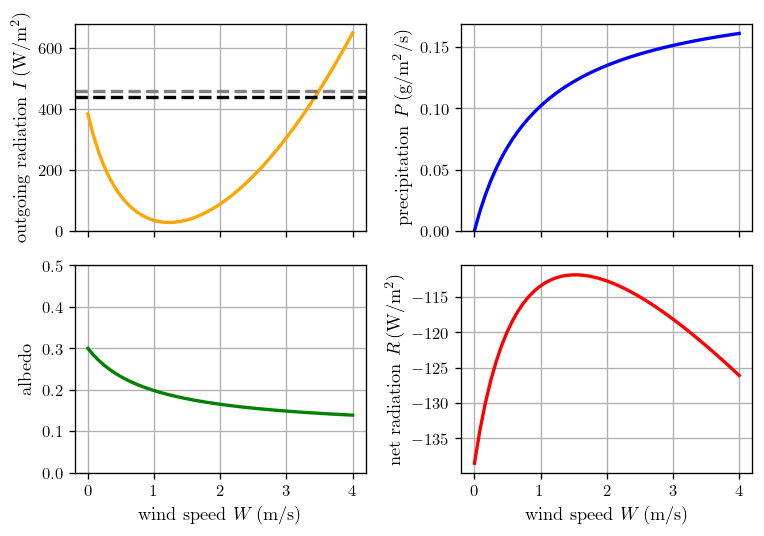

In [10]:
plot_graphs(A=A, E=E, T_O=T_O, q_O=q_O, alpha=alpha, beta=beta, epsilon=epsilon, albedo_feedback=True)